## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 

## Load the Data

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

## Check Duplicate Values

In [6]:
df.duplicated().sum()

0

There are no duplicates in the dataset

## Check Data Types

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

## Check the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring Data

In [10]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("There are {} numerical features: {}".format(len(numerical_features),numerical_features))
print("There are {} categorical features: {}".format(len(categorical_features),categorical_features))

      

There are 3 numerical features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Add "Total Score" and "Average" Columns

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
math_full = df[df['math_score']==100]
reading_full = df[df['reading_score']==100]
writing_full = df[df['writing_score']==100]

print("Number of students with full marks in math", len(math_full))
print("Number of students with full marks in reading", len(reading_full))
print("Number of students with full marks in writing", len(writing_full))

Number of students with full marks in math 7
Number of students with full marks in reading 17
Number of students with full marks in writing 14


In [15]:
math_less_20 = df[df['math_score']<=20]
reading_less_20 = df[df['reading_score']<=20]
writing_less_20 = df[df['writing_score']<=20]

print("Number of students with full marks in math", len(math_less_20))
print("Number of students with full marks in reading", len(reading_less_20))
print("Number of students with full marks in writing", len(writing_less_20))

Number of students with full marks in math 4
Number of students with full marks in reading 1
Number of students with full marks in writing 3


## Visualisations

### Histograms and KDE

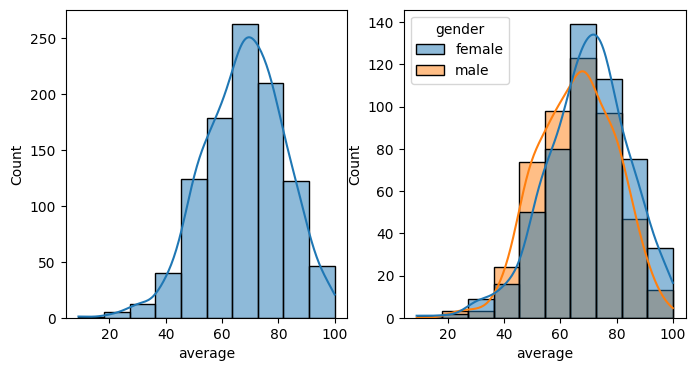

In [16]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=10, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='average', bins=10, kde=True, hue='gender')
plt.show()

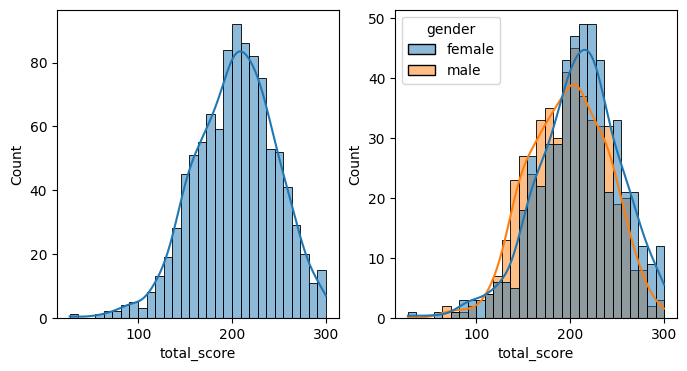

In [17]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

Female Student perform better than Male Students

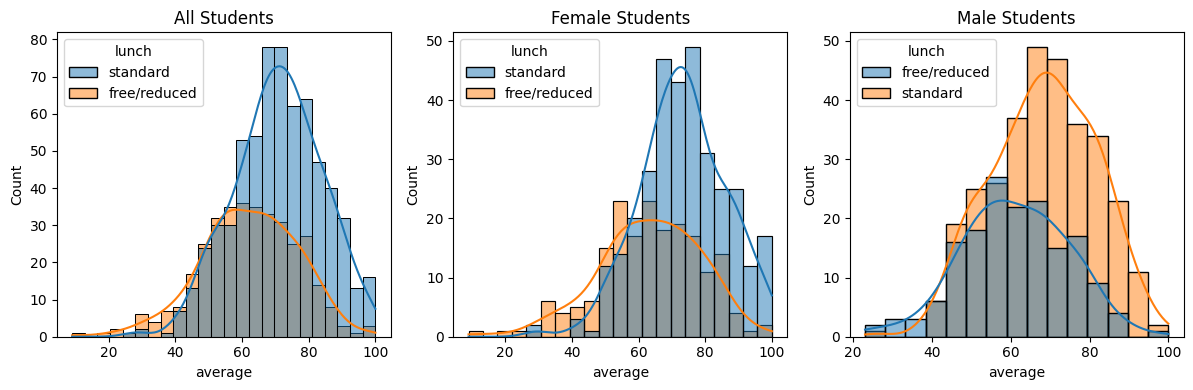

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("All Students")
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch' )
plt.title("Female Students")
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch' )
plt.title("Male Students")
plt.tight_layout()
plt.show()

Standard lunch helps students perform well in Exam

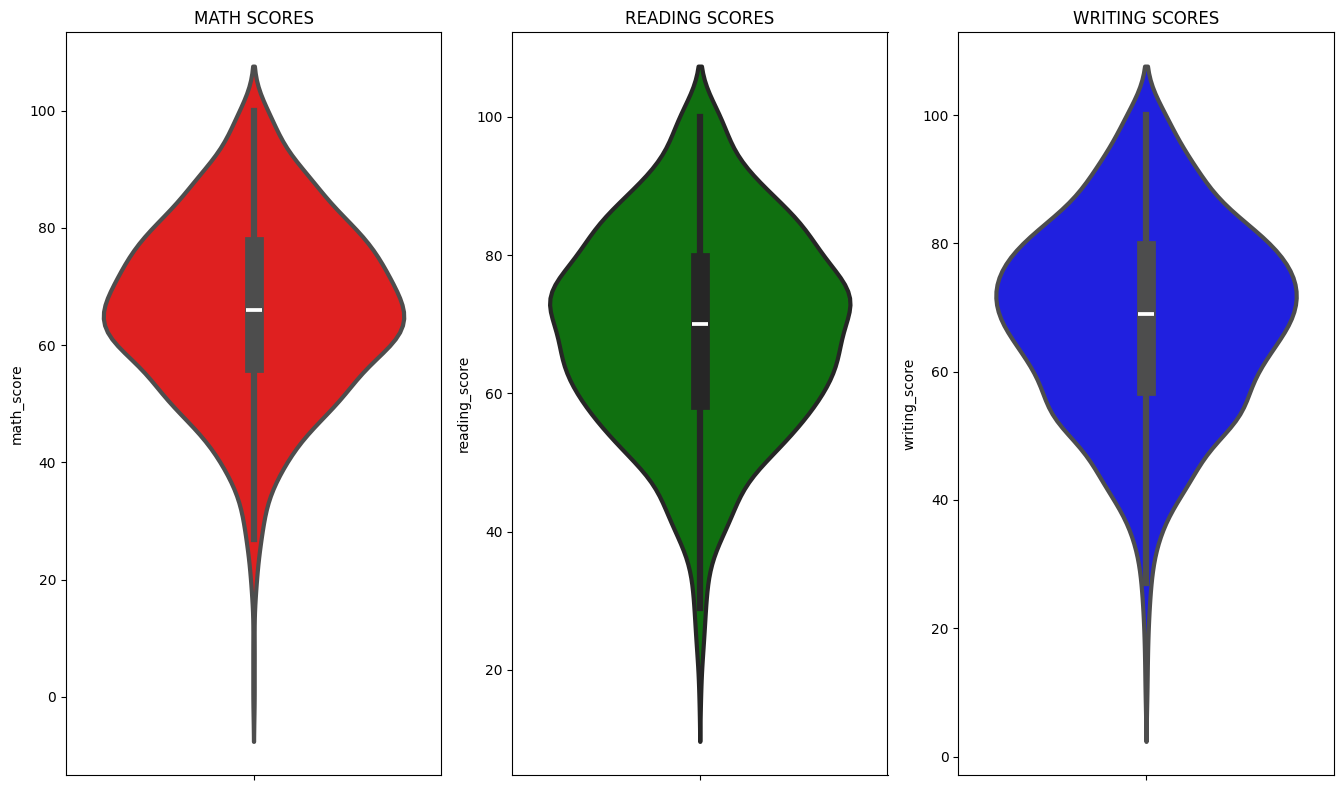

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.tight_layout()
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

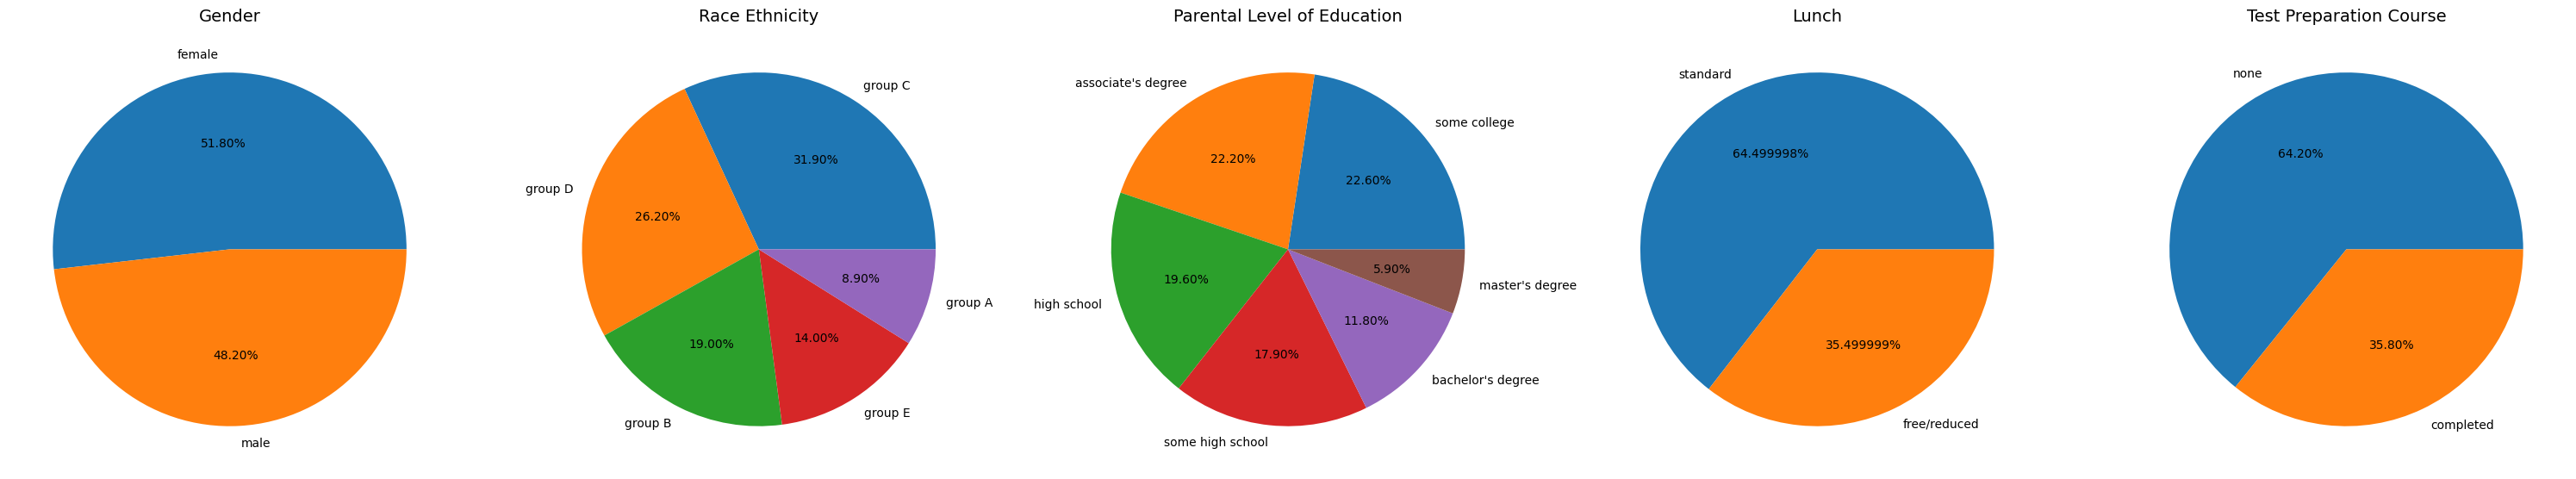

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
plt.pie(df['gender'].value_counts().values, labels = df['gender'].value_counts().index, autopct = '%1.2f%%')
plt.title('Gender', fontsize = 14)

plt.subplot(1, 5, 2)
plt.pie(df['race_ethnicity'].value_counts().values, labels = df['race_ethnicity'].value_counts().index, autopct = '%1.2f%%')
plt.title('Race Ethnicity', fontsize = 14)

plt.subplot(1, 5, 3)
plt.pie(df['parental_level_of_education'].value_counts().values, labels = df['parental_level_of_education'].value_counts().index, autopct = '%1.2f%%')
plt.title('Parental Level of Education', fontsize = 14)

plt.subplot(1, 5, 4)
plt.pie(df['lunch'].value_counts().values, labels = df['lunch'].value_counts().index, autopct = '%2f%%')
plt.title('Lunch', fontsize = 14)

plt.subplot(1, 5, 5)
plt.pie(df['test_preparation_course'].value_counts().values, labels = df['test_preparation_course'].value_counts().index, autopct = '%1.2f%%')
plt.title('Test Preparation Course', fontsize = 14)

plt.tight_layout()

* Number of Male and Female Students are almost equal
* Number of Students are greatest in Group C
* Number of students whose Parental Level of Education is "Some College" is greater followed closely by "Associate's Degree"
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater